In [1]:
pip install pandas==0.25.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
print(pd.__version__)
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, make_scorer, mean_squared_log_error
import lightgbm as lgb
warnings.filterwarnings('ignore')

0.25.1


In [3]:
train = pd.read_excel("C:\\Users\\S.ABHIRAM REDDY\\Downloads\\Data_Train.xlsx")
test = pd.read_excel("C:\\Users\\S.ABHIRAM REDDY\\Downloads\\Data_Test.xlsx")

Text(0.5, 1.0, 'Skewness is: 0.7543716000992179\n, Kurtosis is: 0.31018039291429167')

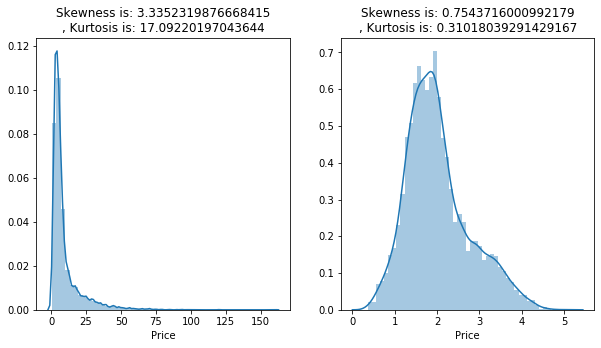

In [4]:
fig, ax= plt.subplots(1,2,figsize=(10,5))
sns.distplot(train.Price, kde=True, ax=ax[0])
train.Price.skew(), train.Price.kurt()
ax[0].set_title('Skewness is: %s\n, Kurtosis is: %s'%((train.Price).skew(), (train.Price).kurt()))
sns.distplot(np.log1p(train.Price), ax=ax[1])
plt.title('Skewness is: %s\n, Kurtosis is: %s'%(np.log1p(train.Price).skew(), np.log1p(train.Price).kurt()))

In [5]:
train.Price = np.log1p(train.Price)
q3 = train.Price.quantile(0.75)
q1 = train.Price.quantile(0.25)
iqr = q3-q1
upper = q3 + 2.5 * iqr
lower = q1 - 2.5 *iqr

d=np.where((train.Price > upper) | (train.Price < lower))
train.drop(index=d[0],inplace=True)
train.reset_index(drop=True, inplace=True)

In [6]:
def filler(data,name, engine, power, seat):
    location = data[data.Name == name].index
    for i in location:
        data.ix[location,'Engine'] = engine
        data.ix[location,'Power'] = power
        data.ix[location,'Seats'] = seat
        #print(data.loc[location])
        return(data)

In [7]:
train = filler(train, 'Maruti Swift 1.3 VXi', '1197cc', '82bhp',5) 
train = filler(train, 'Honda City 1.5 GXI' , '1497cc', '117bhp',5)
train = filler(train, 'Maruti Swift 1.3 ZXI', '1248cc', '74bhp',5) 
train = filler(train, 'Honda City 1.3 DX', '1497cc', '117bhp',5) 
train = filler(train, 'Maruti Swift 1.3 LXI', '1248cc', '74bhp',5) 
train = filler(train, 'Maruti Swift 1.3 VXI ABS', '1248cc', '74bhp',5) 
train = filler(train, 'Hyundai Santro LP zipPlus', '1086cc', '58bhp',5) 
train = filler(train, 'Toyota Etios Liva V', '1197cc', '79bhp',5)
 
train = filler(train, 'Land Rover Range Rover Sport 2005 2012 Sport', '4999cc', '503bhp',5)    
train = filler(train, 'BMW 5 Series 520d Sedan', '2993cc', '265bhp',5)
train = filler(train, 'Hyundai Santro GLS II - Euro II', '814cc', '55bhp',5)
train = filler(train, 'Maruti Wagon R Vx', '1197cc', '81.8bhp',5)

train = filler(train, 'Honda CR-V AT With Sun Roof', '1997cc', '154bhp' ,7)
train = filler(train, 'Fiat Punto 1.3 Emotion', '1248cc', '90bhp',5)
train = filler(train, 'Land Rover Range Rover 3.0 D', '2993cc', '255bhp', 7)

train = filler(train, 'Hyundai Santro Xing XG', '1086cc', '63bhp',5)
train = filler(train, 'Hyundai Santro GLS II - Euro II', '1997cc', '154bhp',5)
train = filler(train, 'Honda Jazz Select Edition', '1199cc', '88bhp',5)

train = filler(train, 'Fiat Punto 1.2 Dynamic', '1172cc', '67bhp',5)
train = filler(train, 'Fiat Punto 1.4 Emotion', '1368cc', '88bhp',5)

test = filler(test, 'Maruti Swift 1.3 VXi', '1197cc', '82bhp',5) 
test = filler(test, 'Toyota Etios Liva V', '1197cc', '79bhp',5)
test = filler(test, 'BMW 5 Series 520d Sedan', '2993cc', '265bhp',5)
test = filler(test, 'Fiat Punto 1.4 Emotion', '1368cc', '88bhp',5)
test = filler(test, 'Skoda Laura 1.8 TSI Ambition', '1798cc', '157bhp',5) 
test = filler(test, 'Toyota Etios Liva Diesel TRD Sportivo', '1364cc', '67bhp',5)
test = filler(test, 'Hyundai i20 new Sportz AT 1.4', '1366cc', '89bhp',5)
test = filler(test, 'Mahindra TUV 300 P4', '2179cc', '120bhp',10)

In [8]:
import re
train.Name = train.Name.apply(lambda x: x.lower())
test.Name = test.Name.apply(lambda x: x.lower())
train.Name = train.Name.apply(lambda x: re.sub('new','',x))
test.Name = test.Name.apply(lambda x: re.sub('new','',x))
train.Name = train.Name.apply(lambda x: re.sub('evo','',x))
test.Name = test.Name.apply(lambda x: re.sub('evo','',x))
train.Name = train.Name.apply(lambda x: re.sub('amt','',x))
test.Name = test.Name.apply(lambda x: re.sub('amt','',x))
train.Name = train.Name.apply(lambda x: re.sub('\s*grande','',x))
train.Name = train.Name.apply(lambda x: re.sub('\s*punto','',x))
test.Name = test.Name.apply(lambda x: re.sub('\s*grande','',x))
test.Name = test.Name.apply(lambda x: re.sub('\s*punto','',x))
train.Name = train.Name.apply(lambda x: re.sub('\s*ikon','',x))
test.Name = test.Name.apply(lambda x: re.sub('\s*ikon','',x))
train.Name = train.Name.apply(lambda x: re.sub('\s*getz','',x))
test.Name = test.Name.apply(lambda x: re.sub('\s*getz','',x))
train.Name = train.Name.apply(lambda x: re.sub('-benz',' ',x))
test.Name = test.Name.apply(lambda x: re.sub('-benz',' ',x))

In [9]:
import re
pattern = re.compile(r'(Maruti|volvo|jeep|bentley|Hindustan Motors|OpelCorsa|isuzu|chevrolet|fiat|cooper|Hyundai|BMW|Honda|Toyota|datsun|jaguar|Skoda|Audi|Mercedes|Porsche|Mahindra|Nissan|ford|Volkswagen|Tata|land rover|mitsubishi|renault)', re.IGNORECASE)
train['Name_t'] = train.Name.str.extract(pattern)

junk = train[train.Name_t.isnull()]
junk.index
train.drop(index= junk.index, inplace=True)
train.reset_index(drop=True, inplace=True)
test['Name_t'] = test.Name.str.extract(pattern)

In [10]:
pattern = re.compile(r"^(\w*[.]*\w*\s*-*\w*[.]*\w*)")
train['Model'] = train.Name.str.extract(pattern)
test['Model'] = test.Name.str.extract(pattern)

In [11]:
test.Model.replace({'bentley flying': 'bentley continental'}, inplace=True)
train.Model.replace({'fiat  1.2': 'fiat 1.2'}, inplace=True)
test.Model.replace({'fiat  1.3': 'fiat 1.3'}, inplace=True)
train.Model.replace({'fiat  1.3': 'fiat 1.3'}, inplace=True)
test.ix[887,'Power'] = '88bhp'
test.Model.replace({'fiat abarth': 'fiat 1.4'}, inplace=True)

train.Model.replace({'fiat petra':'fiat 1.2'}, inplace=True)
train.Model.replace({'fiat siena':'fiat 1.2'}, inplace=True)
train.Model.replace({'ford fusion':'ford 1.4'}, inplace=True)
train.Model.replace({'ford classic':'ford 1.4'}, inplace=True)
test.Model.replace({'ford classic':'ford 1.4'}, inplace=True)

test.Model.replace({'hindustan motors': 'nissan x'}, inplace=True)
test.Name_t.replace({'hindustan motors': 'nissan'}, inplace=True)
train.Model.replace({'ford classic':'ford 1.4'}, inplace=True)
test.Model.replace({'ford classic':'ford 1.4'}, inplace=True)
train.Model.replace({'honda br':'honda brv'}, inplace=True)
test.Model.replace({'honda br':'honda brv'}, inplace=True)

train.Model.replace({'honda wr':'honda wrv'}, inplace=True)
test.Model.replace({'honda wr':'honda wrv'}, inplace=True)

train.Model.replace({'hyundai gls':'hyundai gle'}, inplace=True)
test.Model.replace({'hyundai gls':'hyundai gle'}, inplace=True)
train.Model.replace({'hyundai gvs':'hyundai gle'}, inplace=True)
train.Model.replace({'hyundai 1.3':'hyundai gle'}, inplace=True)
test.Model.replace({'hyundai gvs':'hyundai gle'}, inplace=True)
test.Model.replace({'hyundai 1.3':'hyundai gle'}, inplace=True)
test.Model.replace({'isuzu mu':'isuzu mux'}, inplace=True)
train.Model.replace({'mahindra e':'mahindra verito'}, inplace=True)

test.Model.replace({'mercedes  c':'mercedes c'}, inplace=True)
train.Model.replace({'mercedes  c':'mercedes c'}, inplace=True)

test.Model.replace({'mercedes   c':'mercedes c'}, inplace=True)
train.Model.replace({'mercedes   c':'mercedes c'}, inplace=True)
test.Model.replace({'mercedes  cla':'mercedes  gla'}, inplace=True)
train.Model.replace({'mercedes  cla':'mercedes  gla'}, inplace=True)
test.Model.replace({'mercedes  gl':'mercedes  gle'}, inplace=True)
train.Model.replace({'mercedes  gl':'mercedes  gle'}, inplace=True)
test.Model.replace({'nissan 370z': 'audi q7'}, inplace=True)
test.Model.replace({'opelcorsa 1.4gsi': 'skoda fabia'}, inplace=True)
test.Name_t.replace({'opelcorsa': 'skoda'}, inplace=True)

test.Model.replace({'tata  safari':'tata safari'}, inplace=True)
train.Model.replace({'tata  safari':'tata safari'}, inplace=True)
test.Model.replace({'toyota land':'toyota fortuner'}, inplace=True)

In [12]:
tr_list = set(list(train.Model.values))
te_list = set(list(test.Model.values))
len(tr_list), len(te_list)

diff=list(tr_list.difference(te_list))
junk = train[train.Model.apply(lambda x : x in diff)]
train.drop(index = junk.index, inplace = True)
train.reset_index(drop=True, inplace=True)

In [13]:
junk = train[train.Price >5]
train.drop(index = junk.index, inplace = True)
train.reset_index(drop=True, inplace=True)

junk = train[train.Fuel_Type == 'Electric']
train.drop(index= junk.index, inplace=True)
train.reset_index(drop=True, inplace=True)

train.Seats.replace({0.0:5.0}, inplace=True)
train.Seats.replace({9:10}, inplace=True)
train[train.Seats.isnull()]


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Name_t,Model
224,ford figo diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,1.526056,ford,ford figo
1875,honda city 1.5 exi,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,0.993252,honda,honda city
3712,ford endeavour hurricane le,Mumbai,2012,129000,Diesel,Automatic,First,12.8 kmpl,2953 CC,null bhp,NaN,2.079442,ford,ford endeavour


In [14]:
train.iloc[224,10] = 5
train.iloc[1875,10] = 5
train.iloc[3712,10] = 7

test.ix[938,'Seats'] = 5

In [15]:
train['Mileage_t'] = train.Mileage.str.extract(r'(\d*[.]*\d*)')
train['Engine_t'] = train.Engine.str.extract(r'(^\d*)')
train['Power_t']=train.Power.str.extract(r'(^\d*[.]*\d*)')
test['Mileage_t'] = test.Mileage.str.extract(r'(\d*[.]*\d*)')
test['Engine_t'] = test.Engine.str.extract(r'(^\d*)')
test['Power_t'] = test.Power.str.extract(r'(\d*[.]*\d*)')

In [16]:
train.Power_t.replace('','NaN', inplace=True)
train.Power_t = train.Power_t.astype('float')
test.Power_t.replace('','NaN', inplace=True)
test.Power_t = test.Power_t.astype('float')

df = pd.concat([train,test], axis=0)
df.Power_t=df.groupby(['Name_t', 'Model','Fuel_Type']).Power_t.transform(lambda x: x.fillna(x.median()))
df.reset_index(drop=True , inplace=True)
df.shape, train.shape,test.shape

((7112, 17), (5878, 17), (1234, 16))

In [17]:
7112-1234

5878

In [18]:
train['Power_t'] = df.loc[:5878,'Power_t']
z = df.loc[5878:,'Power_t']
z.reset_index(drop=True, inplace=True)
test['Power_t'] = z

In [19]:
train.Engine_t = train.Engine_t.astype('float')
train.Mileage_t = train.Mileage_t.astype('float')
train.Power_t = train.Power_t.astype('float')

test.Engine_t = test.Engine_t.astype('float')
test.Mileage_t = test.Mileage_t.astype('float')
test.Power_t = test.Power_t.astype('float')

In [20]:
df=pd.concat([train,test],axis =0)
#df.New_Price.fillna(0, inplace=True)
#x=df[df.New_Price.str.contains(r'Cr').fillna(False)].New_Price.str.extract(r'(\d*[.]*\d*)')[0]
#x = x.astype('float')*100
#index = x.index
#x=list(x)
#i = 0
#for j in list(index):
 #   df.loc[j,'New_Price'] = x[i]
#  i = i + 1
    
#df['New_Price_t'] = df.New_Price.str.extract(r'(\d*[.]*\d*)\s*[a-zA-Z]*')
#df.New_Price_t = df.groupby(['Model','Fuel_Type']).New_Price_t.transform(lambda x: x.fillna(x.median()))
#df.New_Price_t.fillna(df.New_Price_t.median(), inplace=True)
#df.New_Price_t = df.New_Price_t.astype('float')
#df.New_Price_t = np.log1p(df.New_Price_t)
#new=pd.DataFrame(df.groupby(['Name_t'])['New_Price_t'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 1233
Data columns (total 17 columns):
Engine               7112 non-null object
Engine_t             7112 non-null float64
Fuel_Type            7112 non-null object
Kilometers_Driven    7112 non-null int64
Location             7112 non-null object
Mileage              7112 non-null object
Mileage_t            7112 non-null float64
Model                7112 non-null object
Name                 7112 non-null object
Name_t               7112 non-null object
Owner_Type           7112 non-null object
Power                7112 non-null object
Power_t              7112 non-null float64
Price                5878 non-null float64
Seats                7112 non-null float64
Transmission         7112 non-null object
Year                 7112 non-null int64
dtypes: float64(5), int64(2), object(10)
memory usage: 1000.1+ KB


In [21]:
7112-1234

5878

In [22]:
train = df.iloc[:5878,:]
test = df.iloc[5878:,:]
del test['Price']

In [23]:
train['Year_t'] = train.Year.apply(lambda x: 2020 - x )
test['Year_t'] = test.Year.apply(lambda x: 2020 - x )

In [24]:
train.Owner_Type.replace({'First':'1', 'Second':'2', 'Third': '3', 'Fourth & Above': '4'}, inplace=True)
test.Owner_Type.replace({'First':'1', 'Second':'2', 'Third': '3', 'Fourth & Above': '4'}, inplace =True)
train.Owner_Type = train.Owner_Type.astype('int')
test.Owner_Type = test.Owner_Type.astype('int')

train['ow_year'] = np.ceil(train.Owner_Type* train.Year_t/3)
test['ow_year'] = np.ceil(test.Owner_Type* test.Year_t/3)

In [25]:
sport = pd.DataFrame(train.groupby('Name_t').Price.median()>2.5)
y = list(sport[sport.Price==True].index)

train['Sport'] = train.Name_t.apply(lambda x: 1 if x in y else 0)
test['Sport'] = test.Name_t.apply(lambda x: 1 if x in y else 0)

train['Sport_1'] = train.Engine_t.apply(lambda x: 0 if x<2000 else 1)
test['Sport_1'] = test.Engine_t.apply(lambda x: 0 if x<2000 else 1)
train['Sport_2'] = train.Power_t.apply(lambda x: 0 if x<140 else 1)
test['Sport_2'] = test.Power_t.apply(lambda x: 0 if x<140 else 1)
train['Sport'] = train.Sport+train.Sport_1+train.Sport_2
test['Sport'] = test.Sport+test.Sport_1+test.Sport_2
train.Sport = np.where(train.Sport == 3 , 1 , 0)
test.Sport = np.where(test.Sport == 3 , 1 , 0)
train.drop(columns=['Sport_1', 'Sport_2'], inplace=True)
test.drop(columns=['Sport_1', 'Sport_2'], inplace=True)

In [26]:
train['Mileage_zero'] = np.where(train.Mileage_t==0,1,0)
test['Mileage_zero'] = np.where(test.Mileage_t==0,1,0)

In [27]:
train.drop(columns=['Name','Mileage','Year','Engine','Power'], inplace=True)
test.drop(columns=['Name','Mileage','Year','Engine','Power'], inplace=True)

#del train['New_Price']
#del test['New_Price']
for i in train.columns:
    if train[i].dtype == 'O' :
        train[i] = train[i].astype('category')

for i in test.columns:
    if test[i].dtype == 'O' :
        test[i] = test[i].astype('category')

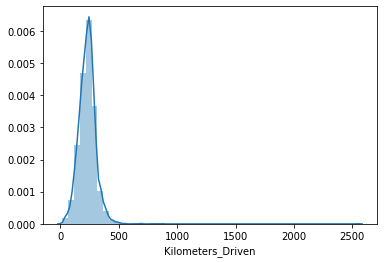

In [28]:
sns.distplot(np.sqrt(train.Kilometers_Driven))
np.sqrt(train.Kilometers_Driven).skew(), np.sqrt(train.Kilometers_Driven).kurt()
train['Kilometers_Driven'] = np.sqrt(train.Kilometers_Driven)
test['Kilometers_Driven'] = np.sqrt(test.Kilometers_Driven)

In [29]:
# filling Power value as mean
train.Power_t.fillna(111, inplace=True)
test.Power_t.fillna(110.0, inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.concat([train, test],axis=0)
df.Model = le.fit_transform(df.Model)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 1233
Data columns (total 16 columns):
Engine_t             7112 non-null float64
Fuel_Type            7112 non-null category
Kilometers_Driven    7112 non-null float64
Location             7112 non-null category
Mileage_t            7112 non-null float64
Mileage_zero         7112 non-null int32
Model                7112 non-null int32
Name_t               7112 non-null category
Owner_Type           7112 non-null int32
Power_t              7112 non-null float64
Price                5878 non-null float64
Seats                7112 non-null float64
Sport                7112 non-null int32
Transmission         7112 non-null category
Year_t               7112 non-null int64
ow_year              7112 non-null float64
dtypes: category(4), float64(7), int32(4), int64(1)
memory usage: 641.1 KB


In [31]:
7112-1234

5878

In [32]:
train.Model = df.iloc[:5878,6]
test.Model = df.iloc[5878:,6]

# Seats into Ordinal variable
train.Seats = train.Seats.astype('int')
test.Seats = test.Seats.astype('int')

train.Seats.replace({2:1, 4:2, 5:3, 6:4, 7:5 ,8:6, 10:7}, inplace=True)
test.Seats.replace({2:1, 4:2, 5:3, 6:4, 7:5 ,8:6, 10:7}, inplace=True)

# Deleting Mileage
del train['Mileage_t']
del test['Mileage_t']

# Converted into Normal distibution
train.Power_t = np.log1p(train.Power_t)
train.Engine_t = np.log1p(train.Engine_t)
test.Power_t = np.log1p(test.Power_t)
test.Engine_t = np.log1p(test.Engine_t)

# Scaling down 
train.Kilometers_Driven = train.Kilometers_Driven/1000
test.Kilometers_Driven = test.Kilometers_Driven/1000

train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [33]:
train_label = train.Price
del train['Price']

In [34]:
train.shape, test.shape

((5878, 49), (1234, 49))

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
def CrossVal(dataX,dataY,mode,cv=5):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring=metric)
    print("cv score",np.mean(score))
    return(np.mean(score))

In [37]:
def rmsle(y_pred, y_test) : 
    return(1-(np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test))**2))))
metric = make_scorer(rmsle)

In [38]:
CrossVal(train, train_label,lgb.LGBMRegressor())

cv score 0.9480810883360242


0.9480810883360242

In [39]:
model = lgb.LGBMRegressor(bagging_fration=0.76999999999999991, boosting_type='gbdt',
       class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.28999999999999998, importance_type='split',
       lambda_l1=0.36999999999999994, lambda_l2=0.050000000000000003,
       learning_rate=0.03, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_gain_split=0.001, min_split_gain=0.0,
       n_estimators=1000, n_jobs=-1, num_leaves=86, objective=None,
       random_state=975, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model.fit(train, train_label)
answer = model.predict(test)

In [40]:
ans = pd.DataFrame({'Price':np.exp(answer)-1})
ans.to_excel('answer.xlsx', index = False)
ans.tail()

,Price
1229,4.306220
1230,5.861145
1231,2.880394
1232,4.704916
1233,18.638905
